# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<nav class="toc">
  <h1>Содержание:</h1>
  <ul>
    <li><a href="#step1">Шаг 1.  Откройте файл с данными и изучите общую информацию</a>
  </ul>
    <ul>
    <li><a href="#step2">Шаг 2.  Предобработка данных</a>
            
  </ul>
  <ul>
  <li><a href="#step3">Шаг 3. Посчитайте и добавьте в таблицу</a>
  </ul>
  <ul>    
  <li><a href="#step4">Шаг 4. Проведите исследовательский анализ данных и выполните инструкции</a>
      <ul>
        <li><a href="#step4.1">Ислледование важных параметров квартир</a>
        <li><a href="#step4.2">Исследование времени продажи квартиры</a>
        <li><a href="#step4.3">Исследование зависимости стоимости квартиры от различных признаков</a>
        <li><a href="#step4.4">Поиск населенных пунктов с наиболее дорогим жильем</a>
        <li><a href="#step4.5">Поиск центра Санкт-Петербурга</a>
        <li><a href="#step4.6">Исследование квартир в центре Санкт-Петербурга</a>
        <li><a href="#step4.7">Влияние различных признаков на стоимость квартиры в центре и сравнение с аналогичным влиянием по области</a>
        </ul>
      
  <li><a href="#step5">Шаг 5. Общий вывод</a>
  </ul>
</nav>

### Шаг 1. Откройте файл с данными и изучите общую информацию.  <a id='step1'></a>

In [3]:
#импортируем библиотеки pandas, datetime, matplotlib, seaborn
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#костыль, чтобы при построении диаграммы рассеивания, pandas не ругался на параметр 'c'
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
#создадим основной датафрейм, запишем его в переменную flats_data
flats_data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
#посмотрим общие данные о датафрейме
flats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
#выведем первые 5 строк датафрейма
flats_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В столбцах датафрейма заключены следующие признаки:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Вывод
В загруженной таблице 23699 записей о продаже квартир. Во многих столбцах есть пропущенные значения, в некоторых процент пропусков очень высок (например, признак апартаментов - возможно, при подаче объявлений многие не заполняют эту графу по незнанию, или потому что знают, что у них не апартаменты). В случае с балконами - это скорее всего незаполненные графы для квартир без балконов. Есть неоднозначные столбцы для тех кто составляет объявление, такие как расстояние до парков и прудов. Многие их просто пропускают, как неважные. <br>
В таблице 22 столбца, среди них есть стоблцы с количественными признаками, которые есть смысл перевести в целочисленный тип данных ('floors_total', 'balcony'). <br>

### Шаг 2. Предобработка данных <a id='step2'></a>

Для начала проверим количество пропусков в таблице по признакам:

In [5]:
def missing_info(data):
    """
    функция, выводящая информацию о количестве пропусков по признакам, их процентном соотношении и типах данных по признакам
    
    """
    #переменная, содержащая в себе количество пропусков по каждому признаку, значения отсортированы по убыванию
    total = data.isnull().sum().sort_values(ascending = False)
    #процент пропусков от общего количества записей в признаке
    percent = ((data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)) * 100
    #объединяем в одну табличку и дадим название столбцам
    missing_data = pd.concat([total, percent], axis = 1, keys = ['Total missing values', 'Percent %'])
    #добавим столбец с типом данных каждого признака
    missing_data['dtype'] = data.dtypes
    return missing_data

missing_info(flats_data)

,Total missing values,Percent %,dtype
is_apartment,20924,88.290645,object
parks_nearest,15620,65.909954,float64
ponds_nearest,14589,61.559559,float64
balcony,11519,48.605426,float64
ceiling_height,9195,38.799105,float64
airports_nearest,5542,23.384953,float64
cityCenters_nearest,5519,23.287902,float64
parks_around3000,5518,23.283683,float64
ponds_around3000,5518,23.283683,float64
days_exposition,3181,13.422507,float64


В признаке 'is_apartment' почти 90% пропусков, можно проверить, есть ли связь это признака с открытой планировкой, количеством комнат и типом квартиры - студия. Возможно, пропуски возникают из-за различных опросных листов, а также незнания продающих лиц, что такое апартаменты, и пропускающих эту графу. 

In [6]:
#создадим список с проверяемыми признаками
type_list = ['studio', 'rooms', 'open_plan']
#выведем сводные таблицы зависимости 'is_apartment' от признаков из составленного выше списка
for name in type_list:
    display(flats_data.pivot_table(index=['is_apartment'], columns = name, values='last_price', aggfunc='count'))
    display()

studio,False,True
is_apartment,,
False,2710.0,15.0
True,50.0,NaN


rooms,0,1,2,3,4,5,6,7,9
is_apartment,,,,,,,,,
False,6.0,907.0,938.0,667.0,149.0,48.0,6.0,3.0,1.0
True,NaN,20.0,13.0,14.0,1.0,1.0,NaN,1.0,NaN


open_plan,False,True
is_apartment,,
False,2718.0,7.0
True,50.0,NaN


Зависимости не обнаружено, пропуски оставляем.

Проверим столбец с количеством балконов.

In [7]:
flats_data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Методом describe мы ранее выяснили, что в столбце 11519 пропущенных значений. Логично предположить, что при заполнении объявлений продавцы квартир без балконов просто пропускают эту графу.

In [8]:
#заменим пропущенные значения столбца 'balcony' на 0 и изменим тип даннных признака
flats_data.loc[flats_data['balcony'].isna(), 'balcony'] = 0
flats_data['balcony'] = flats_data['balcony'].astype('int')

In [9]:
#просмотрим значения в столбце с количеством балконов
flats_data['balcony'].value_counts().sort_index()

0    15277
1     4195
2     3659
3       81
4      183
5      304
Name: balcony, dtype: int64

Заполним пропуски в признаке 'floors_total'. Возьмем среднее значение и заполним им ячейки в тех строках, где этаж квартиры меньше этого значения.
В остальных случаях, примем за общее кол-во этажей этаж квартиры.

In [10]:
#создадим переменную floors_mean, запишем в нее среднее значение кол-ва этажей
floors_mean = flats_data['floors_total'].mean()
flats_data.loc[(flats_data['floors_total'].isna()) & (flats_data['floor'] >= floors_mean), 'floors_total'] = flats_data.loc[flats_data['floors_total'].isna()]['floor']
flats_data.loc[(flats_data['floors_total'].isna()) & (flats_data['floor'] < floors_mean), 'floors_total'] = floors_mean
flats_data['floors_total'] = flats_data['floors_total'].astype('int')

Проверим результат манипуляций:

In [11]:
flats_data['floors_total'].isna().sum()

0

Попробуем заполнить пропуски в столбце с высотой потолков (ceiling_height). Пропуски могут возникать из-за нехватки информацию при создании объявлений (перепланировка и изменение высоты потолков без последующих замеров, незнание высоты продавцом, лень).

In [12]:
#выведем информацию о признаке
flats_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [13]:
#создадим сводную таблицу зависимости высоты потолков от этажности зданий
ceil = flats_data.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = ['median', 'count'])
ceil.columns = ['Медиана', 'Кол-во']
#ознакомимся с результатом
ceil.head(10)

,Медиана,Кол-во
floors_total,,
1,2.80,10
2,2.70,215
3,2.80,399
4,3.00,789
5,2.55,3666
6,3.00,619
7,3.00,398
8,2.80,220
9,2.55,2557


Разобьем здания по общему кол-ву этажей на три группы. Из предыдщей таблицы заметно, что большая часть зданий - типовый панельки 5 и 9 этажей. Выделим их в отдельную группу. Также выделим группы остальных зданий: до 9 этажей и 10 этажей и выше.

In [14]:
#разобьем признак на три группы по этажности зданий
standart_building = flats_data.query('floors_total in (5, 9)')['ceiling_height'].median() #стандартные панельки
unique_building = flats_data.query('floors_total in (1,2,3,4,6,7,8)')['ceiling_height'].median() #нетиповые здания до 10 этажей
high_building = flats_data.query('floors_total > 9')['ceiling_height'].median() #здания выше 9 этажей
standart = [5, 9]
unique = [1, 2, 3, 4, 6, 7, 8]
print(standart_building, unique_building, high_building, sep = ', ')

2.55, 3.0, 2.7


Заменим пропущенные значения с столбце по группам:

In [15]:
flats_data.loc[(flats_data['ceiling_height'].isna() == True) & (flats_data['floors_total'].isin(standart)), 'ceiling_height'] = standart_building
flats_data.loc[(flats_data['ceiling_height'].isna() == True) & (flats_data['floors_total'].isin(unique)), 'ceiling_height'] = unique_building
flats_data.loc[(flats_data['ceiling_height'].isna() == True) & (flats_data['floors_total'] > 9), 'ceiling_height'] = high_building
flats_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.70,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [16]:
flats_data['ceiling_height'].isna().sum()

0

Проверим, можно ли заменить пропущенные значения в столбце locality_name, исходя из принадлежности к Санкт-Петербургу по расстоянию до центра.

In [17]:
piter = flats_data[flats_data['locality_name'] == 'Санкт-Петербург']
piter['cityCenters_nearest'].describe()

count    15660.000000
mean     11601.291571
std       4842.035279
min        181.000000
25%       8327.000000
50%      12244.500000
75%      14943.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

Заполним те пропуски, которые однозначно относятся к Санкт-Петербургу (радиус менее 10000м).

In [18]:
flats_data.loc[(flats_data['locality_name'].isna()) & (flats_data['cityCenters_nearest'] < 10000), 'locality_name'] = 'Санкт-Петербург'
flats_data['locality_name'].isna().sum()

24

Как видно, Санкт-Петербург имеет неправильную форму и некоторые его окраины дальше от центра, чем пригороды.
Напишем функцию для заполнения пропущенных значений расстояния от центра для всех населенных пунктов по среднему значению.

In [19]:
flats_data['cityCenters_nearest'].isna().sum()

5519

Пропуски могли возникнуть для удаленных пригородов Санкт-Петербурга, где расстояние до центра столицы слишком велико и просто не рассчитывается.

In [20]:
def replace_centers(flats_data):
    """"
    функция создает список уникальных названий населенных пунктов и заменяет пропущенные значения на среднее по населенному пункту
    
    """
    cities = flats_data['locality_name'].unique()
    for name in cities:
        centers_avg = flats_data[flats_data['locality_name'] == name]['cityCenters_nearest'].mean()
        flats_data.loc[(flats_data['cityCenters_nearest'].isna() == True) & (flats_data['locality_name'] == name), 'cityCenters_nearest'] = centers_avg
replace_centers(flats_data)
flats_data['cityCenters_nearest'].isna().sum()

5394

Аналогичное действие проведем с признаков 'airports_nearest'. Еще раз выведем количество пропусков:

In [21]:
flats_data['airports_nearest'].isna().sum()

5542

Пропуски могли возникнуть для удаленных пригородов Санкт-Петербурга, где расстояние до аэропорта слишком велико и просто не рассчитывается.

In [22]:
def replace_airports(flats_data):
    """"
    функция создает список уникальных названий населенных пунктов и заменяет пропущенные значения на среднее по населенному пункту
    
    """
    cities = flats_data['locality_name'].unique()
    for name in cities:
        airports_avg = flats_data[flats_data['locality_name'] == name]['airports_nearest'].mean()
        flats_data.loc[(flats_data['airports_nearest'].isna() == True) & (flats_data['locality_name'] == name), 'airports_nearest'] = airports_avg
replace_airports(flats_data)
flats_data['airports_nearest'].isna().sum()

5394

Как видно, в результате действия функции была заменена лишь малая часть значений. Видимо, для многих населенных пунктов расстояние до аэропорта не указано даже для одной квартиры.

Заменим тип данных в столбце 'total_area' на целочисленный, заодно получим меньшее количество значений по этому признаку.

In [23]:
flats_data['total_area'] = flats_data['total_area'].astype('int')

Займемся пропусками в столбце 'living_area' (жилая площадь).

In [24]:
living_corr = flats_data.corr()
living_corr['living_area']

total_images           0.104780
last_price             0.566492
total_area             0.939550
rooms                  0.845977
ceiling_height         0.083496
floors_total          -0.169154
living_area            1.000000
floor                 -0.097210
studio                -0.056231
open_plan             -0.033711
kitchen_area           0.428674
balcony               -0.014772
airports_nearest      -0.060050
cityCenters_nearest   -0.232012
parks_around3000       0.184453
parks_nearest         -0.050167
ponds_around3000       0.148933
ponds_nearest         -0.081674
days_exposition        0.142454
Name: living_area, dtype: float64

Видим высокую зависимость от количественной переменной 'rooms', будет удобно заполнить пропуски по группам исходя из кол-ва комнат.

In [27]:
#заполним пропуски используя сочетание функций groupby и transform
flats_data['living_area'] = flats_data['living_area'].fillna(flats_data.groupby('rooms')['living_area'].transform('mean'))
#проверим результат
flats_data['living_area'].isna().sum()

0

Перейдем к столбцу 'kitchen_area' (площадь кухни).

Округлим значения площади кухни до целых (для нашего исследования такой точности будет достаточно).

In [293]:
flats_data['kitchen_area'] = flats_data['kitchen_area'].round(0)

In [294]:
#выведем матрицу корреляции
kitchen_corr = flats_data.corr()
kitchen_corr['kitchen_area']

total_images           0.104388
last_price             0.519635
total_area             0.608436
rooms                  0.269203
ceiling_height         0.081628
floors_total           0.163117
living_area            0.424098
floor                  0.135091
studio                      NaN
open_plan                   NaN
kitchen_area           1.000000
balcony                0.045104
airports_nearest       0.005430
cityCenters_nearest   -0.189515
parks_around3000       0.087869
parks_nearest          0.030131
ponds_around3000       0.150493
ponds_nearest         -0.105521
days_exposition        0.100341
Name: kitchen_area, dtype: float64

In [295]:
#создадим сводную таблицу зависимости цены квартиры от этажа
kitchen_pivot = flats_data.pivot_table(index = 'kitchen_area', values = 'total_area', aggfunc = 'mean').sort_values(by = 'kitchen_area') 
kitchen_pivot

,total_area
kitchen_area,
1.0,28.000000
2.0,24.111111
3.0,33.000000
4.0,36.627451
5.0,43.125145
...,...
93.0,163.500000
100.0,590.000000
101.0,255.000000


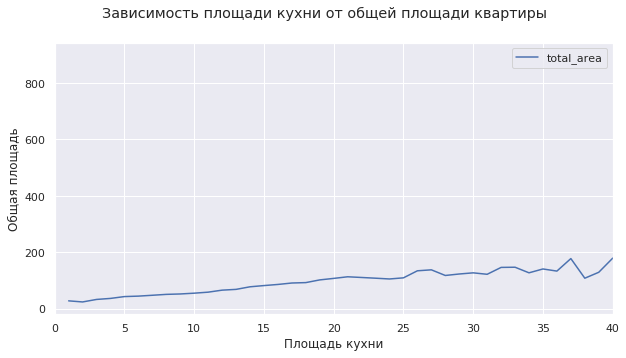

In [296]:
#построим линейный график по сводной таблице
kitchen_pivot.plot(y='total_area', style = '-', figsize=(10, 5), grid=True)
plt.xlim(0, 40)
plt.suptitle('Зависимость площади кухни от общей площади квартиры')
plt.xlabel('Площадь кухни')
plt.ylabel('Общая площадь');

Можно заменить пропуски аналогичным способом с 'living_area'.

In [297]:
#заполним пропуски используя сочетание функций groupby и transform
flats_data['kitchen_area'] = flats_data['kitchen_area'].fillna(flats_data.groupby('total_area')['kitchen_area'].transform('mean'))
#проверим результат
flats_data['kitchen_area'].isna().sum()

23

Оставшиеся 23 пропуска можно заменить медианой по столбцу, но я принял решение их оставить, такое мизерное количество не повлияет на результаты исследования. К тому же, судя по условиям задания, этот столбец не участвует в исследовании.

Оценим ситуацию по признаку 'days_exposition'.

In [298]:
#выведем столбцы 'days_exposition' и 'first_day_exposition'
flats_data[['days_exposition', 'first_day_exposition']].head(10)

,days_exposition,first_day_exposition
0,NaN,2019-03-07T00:00:00
1,81.0,2018-12-04T00:00:00
2,558.0,2015-08-20T00:00:00
3,424.0,2015-07-24T00:00:00
4,121.0,2018-06-19T00:00:00
5,55.0,2018-09-10T00:00:00
6,155.0,2017-11-02T00:00:00
7,NaN,2019-04-18T00:00:00
8,189.0,2018-05-23T00:00:00
9,289.0,2017-02-26T00:00:00


Теоретически, можно было бы заполнить пропуски исходя из даты публикации. Но при сравнении этих двух столбцов, оказалось, что дата снятия с продажи для каждой квартиры различна. Так как столбец будет использоваться в дальнейшем, принято решение пропуски не заполнять во избежание искажения результатов.

Пропуски по остальным признакам или не важны для исследования (parks_around3000, ponds_around3000, parks_nearest, ponds_nearest), заполнять их не имеет смысла.
<br>
<br>
Проверим результаты наших действий:

In [299]:
#выведем результат действия функции missing_info
missing_info(flats_data)

,Total missing values,Percent %,dtype
is_apartment,20924,88.290645,object
parks_nearest,15620,65.909954,float64
ponds_nearest,14589,61.559559,float64
ponds_around3000,5518,23.283683,float64
parks_around3000,5518,23.283683,float64
cityCenters_nearest,5394,22.760454,float64
airports_nearest,5394,22.760454,float64
days_exposition,3181,13.422507,float64
locality_name,24,0.101270,object
kitchen_area,23,0.097051,float64


Проверим датафрейм на количество полных дубликатов.

In [300]:
flats_data.duplicated().sum()

0

### Вывод

<li> Были заполнены пропуски в столбцах 'balcony'на 0, согласно гипотезе, что имела место ошибка при заполнении объявлений. 
Столбцы 'ceiling_height' и 'total_floors' были полностью избавлены от пропусков путем написания функций, разбивающих столбец на группы и заменяющих пропущенные значения на средние и медианные значения для этих групп. </li>
<li> Был заменен тип данных в столбцах 'total_area' (так как высокая точность данных (знаки после запятой в данном проекте не нужна), плюс, это облегчает читаемость данных), 'balcony', 'total_floors' на целочисленные методом .astype(). </li>
<li> Частично заменены пропуски по признакам 'cityCenters_nearest', 'airport_nearest', 'locality_name'. Полная замена не представляется возможной из-за нехватки данных по которым можно однозначно заполнить пропуск. </li>
<li> Пропуски по остальным признакам или не важны для исследования (parks_around3000, ponds_around3000, parks_nearest, ponds_nearest), или при заполнении медианой или средним могут исказить результаты (days_exposition, kitchen_area, living_area). </li>


### Шаг 3. Посчитайте и добавьте в таблицу  <a id='step3'></a>

Добавим в датафрейм столбец с ценой квадратного метра квартиры.

In [301]:
flats_data['sqm_price'] = flats_data['last_price'] / flats_data['total_area']
#проверим результат
flats_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price
0,20,13000000.0,108,2019-03-07T00:00:00,3,2.70,16,51.000000,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40,2018-12-04T00:00:00,1,2.70,11,18.600000,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000
2,10,5196000.0,56,2015-08-20T00:00:00,2,2.55,5,34.300000,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159,2015-07-24T00:00:00,3,2.70,14,47.387941,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100,2018-06-19T00:00:00,2,3.03,14,32.000000,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Добавим столбцы с днем недели, месяцем и годом публикации объявления о продаже квартиры.

In [302]:
#изменим формат даты
flats_data['first_day_exposition'] = pd.to_datetime(flats_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
flats_data['weekday'] = flats_data['first_day_exposition'].dt.weekday
flats_data['month'] = flats_data['first_day_exposition'].dt.month
flats_data['year'] = flats_data['first_day_exposition'].dt.year
#выведем первые 5 записей датафрейма
flats_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,83750.000000,1,12,2018
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Напишем функцию, разбивающую этажи, на которых расположена квартира, на группы.

In [303]:
def floor_types(row):
    
    """
    функция, разбивающая квартиры по этажам 
    
    """
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

#применяем функцию floor_types к flats_data
flats_data['floor_type'] = flats_data.apply(floor_types, axis = 1) 
#проверяем результат действия функции
flats_data['floor_type'].value_counts() 

Другой       17409
Последний     3373
Первый        2917
Name: floor_type, dtype: int64

Теперь добавим столбец с отношением жилой площади квартиры к общей площади.

In [304]:
flats_data['area_ratio'] = flats_data['living_area'] / flats_data['total_area']
#проверим результат
flats_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222
1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,NaN,...,NaN,0.0,NaN,81.0,83750.000000,1,12,2018,Первый,0.465000
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000


Аналогично создадим столбец с отношением площади кухни к общей площади квартиры.

In [305]:
flats_data['kitchen_ratio'] = flats_data['kitchen_area'] / flats_data['total_area']
#проверим результат
flats_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,NaN,...,0.0,NaN,81.0,83750.000000,1,12,2018,Первый,0.465000,0.275000
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000


### Вывод

Были рассчитаны и добавлены в датафрейм следующие столбцы:
- sqm_price - средняя стоимость квадртаного метра квартиры
- floor_type - тип этажа, на котором расположена квартира (первый, последний, другой)
- area_ratio - отношение жилой площади квартиры к общей площади
- kitche_ratio - отношение площади кухни квартиры к общей площади 

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:  <a id='step4'></a>

#### Исследование важных параметров квартир <a id='step4.1'></a>

Для облегчения изучения признаков немного автоматизируем работу. Напишем функцию, получающую на вход имя датафрейма и столбца в нем, и выводящую общую информацию, диаграмму размаха и гистограмму по столбцу.

In [306]:
def info_graph(data, name):
    Q1 = data[name].quantile(0.25)
    Q3 = data[name].quantile(0.75)
    IQR = Q3 - Q1
    if len(data[name].value_counts()) <= 70:
        bin_num = len(data[name].value_counts())
    elif 70 < len(data[name].value_counts()) <= 350: 
        bin_num = int(len(data[name].value_counts()) / 3)
    else:
        bin_num = int(len(data[name].value_counts()) / 30)
    
    display(data[name].value_counts().sort_index())
    print()
    display(data[name].describe())
    print()
    data.boxplot(name, figsize = (7, 7));
    data.hist(name, bins = bin_num, range = (0, Q3+4*IQR), figsize = (15, 7))
    plt.xlabel(name)
    plt.ylabel('Кол-во');

Сначала изучим признак цены квартиры. Выведем информацию о столбце, построим гистограму и диаграмму размаха, найдем выбросы.

12190.0        1
430000.0       2
440000.0       1
450000.0       4
470000.0       3
              ..
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, Length: 2978, dtype: int64

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

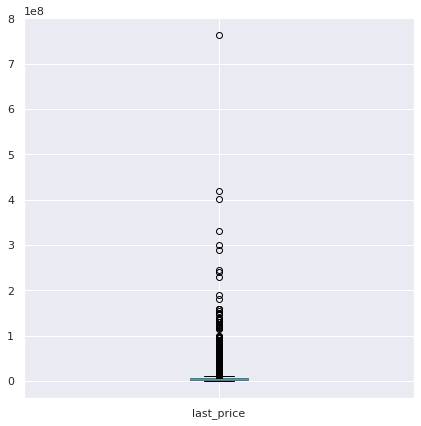

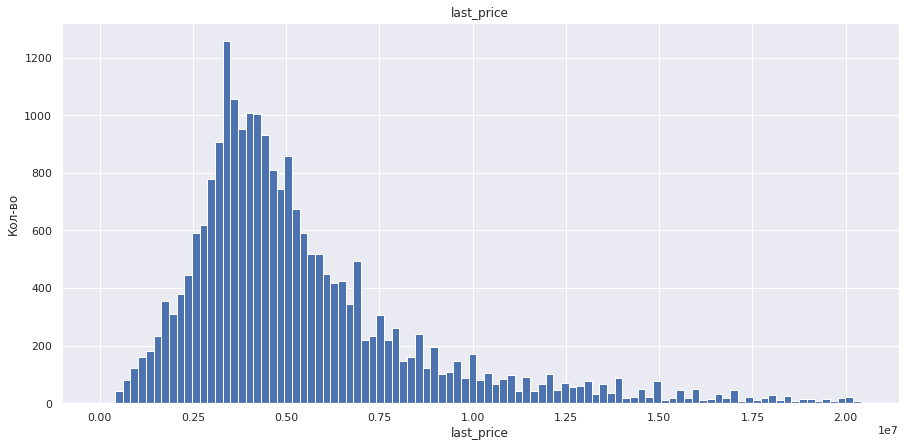

In [307]:
info_graph(flats_data, 'last_price')

Видим нереально низкое значение 12190 - явно это или ошибка,  или фейковое объявление. Также есть редкие объявления с ценой более 200кк - элитное жилье. 

По построеннымм графикам можно сделать вывод, что большинство квартир продаются по цене до 30кк, после 100кк их количество единично, можно взять значение в 75кк за верхнюю границу, все, что выше - считать выбросами. Аналогично, нижняя граница - 440000, ниже которой - значения, подлежащее удалению.

In [308]:
#создадим новый датафрейм, в который запишем очищенные данные
flats_data_good = flats_data.query('last_price > 440000 and last_price < 75e6')
#проверим результат
flats_data_good.sort_values(by = 'last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
16219,14,450000.0,38,2018-07-11,2,2.65,2,31.736849,1,NaN,...,NaN,NaN,45.0,11842.105263,2,7,2018,Первый,0.835180,0.261059
9581,7,450000.0,43,2018-08-31,2,2.55,5,30.300000,3,NaN,...,NaN,NaN,96.0,10465.116279,4,8,2018,Другой,0.704651,0.139535
17676,0,450000.0,36,2018-02-01,1,2.55,5,17.300000,4,NaN,...,NaN,NaN,120.0,12500.000000,3,2,2018,Другой,0.480556,0.222222
5698,7,450000.0,42,2017-07-31,2,3.00,1,23.000000,1,NaN,...,NaN,NaN,233.0,10714.285714,0,7,2017,Первый,0.547619,0.142857
21912,0,470000.0,37,2018-02-18,1,3.00,3,17.893552,3,NaN,...,NaN,NaN,45.0,12702.702703,6,2,2018,Последний,0.483610,0.260212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558,18,72000000.0,251,2016-02-19,3,2.75,4,47.387941,3,NaN,...,0.0,NaN,500.0,286852.589641,4,2,2016,Другой,0.188797,0.121514
11336,14,72375000.0,169,2015-06-18,4,3.00,8,95.400000,4,NaN,...,2.0,599.0,571.0,428254.437870,3,6,2015,Другой,0.564497,0.130178
14668,6,73884056.0,250,2018-03-25,3,3.08,12,101.540000,12,False,...,3.0,153.0,215.0,295536.224000,6,3,2018,Последний,0.406160,0.128000
20820,7,73900000.0,342,2015-06-18,5,3.00,4,187.000000,2,False,...,1.0,251.0,377.0,216081.871345,3,6,2015,Другой,0.546784,0.029240


Изучим следующий признак - общую площадь квартиры.

12     1
13     4
14     1
15     3
16     1
      ..
470    1
483    1
494    1
517    1
590    1
Name: total_area, Length: 287, dtype: int64

count    23625.000000
mean        59.424847
std         32.430354
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        590.000000
Name: total_area, dtype: float64

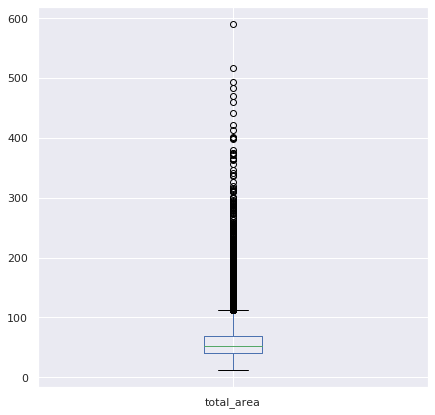

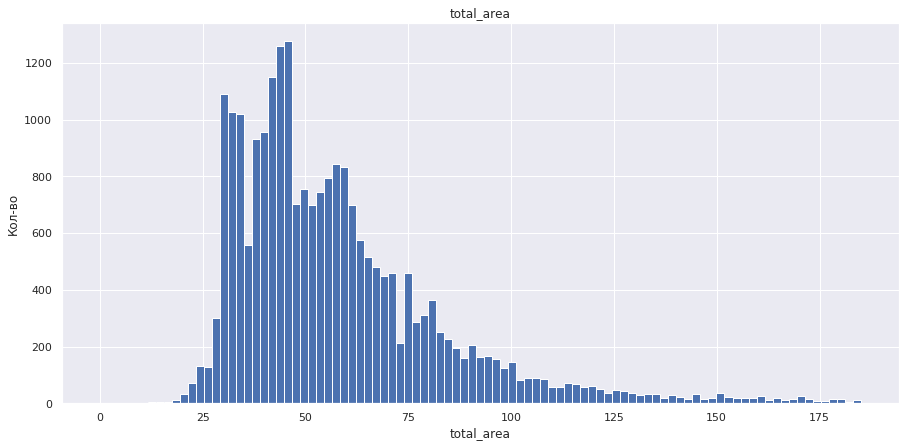

In [309]:
#применим написанную ранее функцию info_graph
info_graph(flats_data_good, 'total_area')

Изучив гистограммы, можно сделать вывод, что значения ниже примерно 20 кв.м. и выше 250 кв.м. единичны и непоказательны для исследования. Можем от них избавиться.

In [310]:
#создадим новый датафрейм, в который запишем очищенные данные
flats_data_good = flats_data_good.query('20 < total_area < 250')
#проверим результат
flats_data_good

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,NaN,...,0.0,NaN,81.0,83750.000000,1,12,2018,Первый,0.465000,0.275000
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133,2017-03-21,3,3.70,5,73.300000,3,NaN,...,3.0,381.0,NaN,72932.330827,1,3,2017,Другой,0.551128,0.105263
23695,14,3100000.0,59,2018-01-15,3,2.55,5,38.000000,4,NaN,...,NaN,NaN,45.0,52542.372881,0,1,2018,Другой,0.644068,0.135593
23696,18,2500000.0,56,2018-02-11,2,3.00,3,29.700000,1,NaN,...,NaN,NaN,NaN,44642.857143,6,2,2018,Первый,0.530357,0.156818
23697,13,11475000.0,76,2017-03-28,2,3.00,17,31.736849,12,NaN,...,3.0,196.0,602.0,150986.842105,1,3,2017,Другой,0.417590,0.302632


Далее рассмотрим признак количества комнат.

0      184
1     8014
2     7935
3     5794
4     1157
5      289
6       79
7       36
8        7
9        2
10       1
11       2
14       1
Name: rooms, dtype: int64

count    23501.000000
mean         2.050338
std          1.023084
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

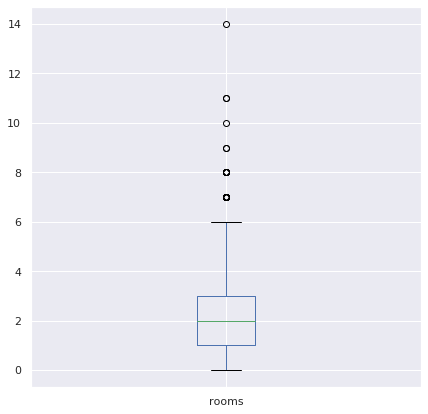

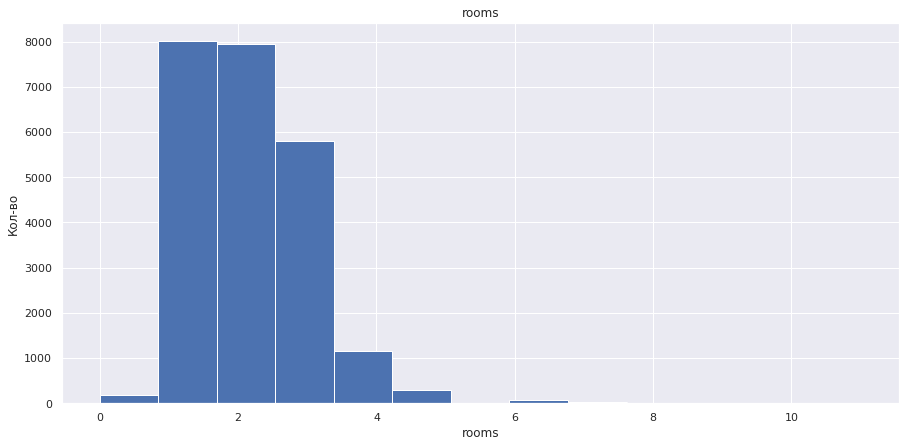

In [311]:
#применим написанную ранее функцию info_graph
info_graph(flats_data_good, 'rooms')

Видим странное количество значение количества комнат - 0. В теории такое возможно, если это студия. Можно проверить эту гипотезу.

In [312]:
#создадим сводную таблицу зависимости количества комнат и признака 'studio'
flats_data_good.pivot_table(index = 'studio', columns = 'rooms', values = 'floor', aggfunc = 'count')

rooms,0,1,2,3,4,5,6,7,8,9,10,11,14
studio,,,,,,,,,,,,,
False,56.0,8003.0,7935.0,5794.0,1157.0,289.0,79.0,36.0,7.0,2.0,1.0,2.0,1.0
True,128.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Большиство студий оказалось как раз со значением в 0 комнат. Значит, значение реальное.<br>
Судя по гистограмме, количество комнат больше 8 практически не встречается. Эти значения единичны и непоказательны, их можно удалить.

In [313]:
#удалим лишние данные из датафрейма
flats_data_good = flats_data_good.query('rooms < 8')
#проверим результат
flats_data_good

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,NaN,...,0.0,NaN,81.0,83750.000000,1,12,2018,Первый,0.465000,0.275000
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133,2017-03-21,3,3.70,5,73.300000,3,NaN,...,3.0,381.0,NaN,72932.330827,1,3,2017,Другой,0.551128,0.105263
23695,14,3100000.0,59,2018-01-15,3,2.55,5,38.000000,4,NaN,...,NaN,NaN,45.0,52542.372881,0,1,2018,Другой,0.644068,0.135593
23696,18,2500000.0,56,2018-02-11,2,3.00,3,29.700000,1,NaN,...,NaN,NaN,NaN,44642.857143,6,2,2018,Первый,0.530357,0.156818
23697,13,11475000.0,76,2017-03-28,2,3.00,17,31.736849,12,NaN,...,3.0,196.0,602.0,150986.842105,1,3,2017,Другой,0.417590,0.302632


Теперь займемся высотой потолков.

1.00       1
1.20       1
1.75       1
2.00      11
2.20       1
          ..
26.00      1
27.00      8
27.50      1
32.00      2
100.00     1
Name: ceiling_height, Length: 176, dtype: int64

count    23488.000000
mean         2.738352
std          0.993990
min          1.000000
25%          2.550000
50%          2.700000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

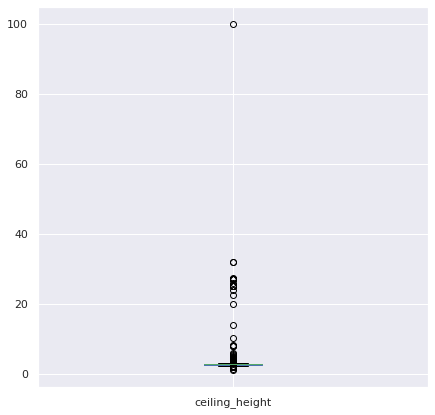

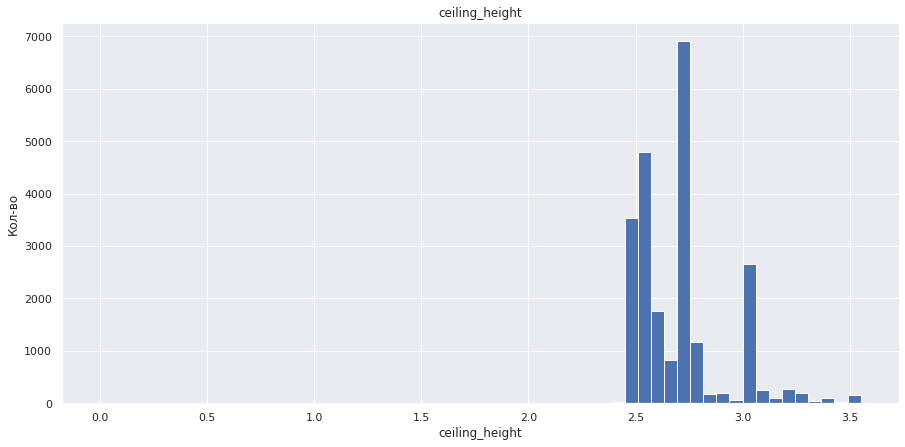

In [314]:
#применим к столбцу написанную ранее функцию info_graph
info_graph(flats_data_good, 'ceiling_height')

Потолков высотой ниже 2.2м мизерное количество, да и в реальности они практически отсутствуют. Такая же ситуация с потолками высотой 4,5м. Избавимся от этих значений.

In [315]:
flats_data_good = flats_data_good.query('ceiling_height > 2.2 and ceiling_height < 4.5')
flats_data_good

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,NaN,...,0.0,NaN,81.0,83750.000000,1,12,2018,Первый,0.465000,0.275000
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133,2017-03-21,3,3.70,5,73.300000,3,NaN,...,3.0,381.0,NaN,72932.330827,1,3,2017,Другой,0.551128,0.105263
23695,14,3100000.0,59,2018-01-15,3,2.55,5,38.000000,4,NaN,...,NaN,NaN,45.0,52542.372881,0,1,2018,Другой,0.644068,0.135593
23696,18,2500000.0,56,2018-02-11,2,3.00,3,29.700000,1,NaN,...,NaN,NaN,NaN,44642.857143,6,2,2018,Первый,0.530357,0.156818
23697,13,11475000.0,76,2017-03-28,2,3.00,17,31.736849,12,NaN,...,3.0,196.0,602.0,150986.842105,1,3,2017,Другой,0.417590,0.302632


#### Вывод

При исследовании основных параметров продаваемых квартир были отброшены следующие значения:
- в столбце 'last_price' - стоимость квартир ниже 440к (одно низкое неправдоподобное значение), выше 75кк - как едичиные значения;
- в столбце 'total_area' - значения ниже примерно 20 кв.м. и выше 250 кв.м. как единичные и непоказательные
- в столбце 'rooms' - число комнат выше 9 - единичные значения
- в столбце 'ceiling_height' - значения ниже 2,2м (неправдоподобно низкие) и 4,5м - слишком редкие

#### Исследование времени продажи квартиры <a id='step4.2'></a>

Проверим столбец с количеством дней, сколько было опубликовано объявление.

In [316]:
#изучим столбец методом describe
flats_data_good['days_exposition'].describe()

count    20299.000000
mean       180.346224
std        219.085903
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение (почти 182 дня) практически в 2 раза выше медианы (96 дней). Видимо, некоторые квартиры продаются значительно лучше, некоторые - наоборот, лучше. Хотя, возможно объявление было снято и без продажи квартиры.
Построим гистограмму по признаку.

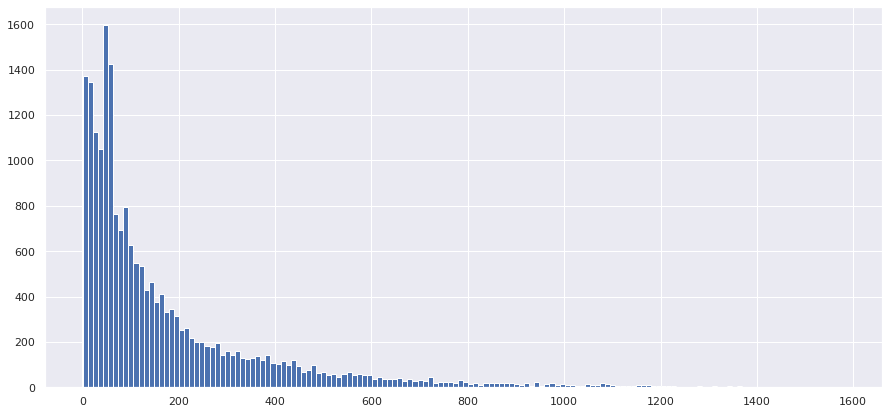

In [317]:
flats_data_good['days_exposition'].hist(bins = 150, figsize = (15, 7));

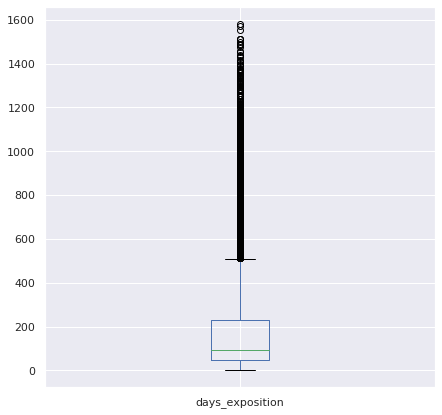

In [318]:
flats_data_good.boxplot('days_exposition', figsize = (7, 7));

По гистограмме можно сделать вывод, что распределение длительности продажи квартиры - это распределение Пуассона.
Полтора межквартильных размаха заканчиваются примерно на 500 днях продажи, по гистограмме можно увидеть что прямой участок начинается примерно после 800 дней продажи. Продажи выше этой отметки можно назвать слишком долгими. Слишком быстрые продажи - продажи быстрее 30 дней, но это - вполне реалистичная ситуация. Возможно, есть зависимость длительности продажи квартиры от ее цены. Проверим это.

In [319]:
#создадим сводную таблицу зависимости длительности продажи от цены квартиры
days_pivot = flats_data_good.pivot_table(index = 'days_exposition', values = 'last_price', aggfunc = 'mean')
days_pivot

,last_price
days_exposition,
1.0,4.000000e+06
2.0,5.992000e+06
3.0,5.102131e+06
4.0,5.412908e+06
5.0,6.242920e+06
...,...
1512.0,8.850000e+06
1513.0,1.330000e+07
1553.0,1.060000e+07


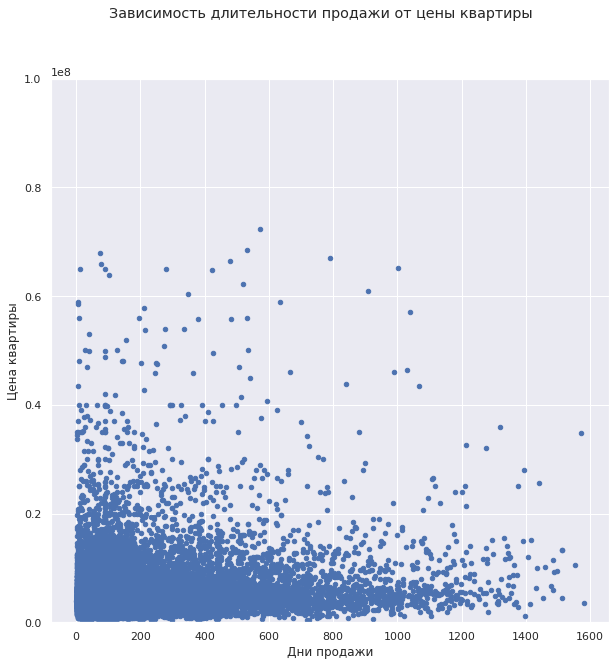

In [320]:
#построим диаграмму разброса
flats_data_good.plot(x='days_exposition', y='last_price', kind='scatter', figsize=(10, 10), grid=True)
plt.ylim(0, 1e8)
plt.suptitle('Зависимость длительности продажи от цены квартиры')
plt.xlabel('Дни продажи')
plt.ylabel('Цена квартиры');

In [321]:
#расчитаем коэфициент Пирсона
flats_data_good['days_exposition'].corr(flats_data_good['last_price'])

0.13081304129189292

Как мы видим, зависимость между ценой и длительностью продажи низкая. При этом дольше 800 дней чаще продаются недорогие квартиры. Возможно, причина в их неудовлетворительном состоянии.
Смысла удалять слишком долгие значения продажи не вижу, в дальнейшем исследовании они не используются, а с ними могут быть удалено важные значения в других признаках.

#### Исследование зависимости стоимости квартиры от различных признаков <a id='step4.3'></a>

Рассмотрим зависимость стоимости квартиры от площади квартиры.

In [322]:
#создадим сводную таблицу зависимости цены квартиры от площади квартиры
area_pivot = flats_data_good.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'mean')
area_pivot.columns = ['last_price']
area_pivot

,last_price
total_area,
21,2.215882e+06
22,2.231186e+06
23,2.529259e+06
24,2.707153e+06
25,2.920949e+06
...,...
240,3.085000e+07
244,3.500000e+07
245,4.025000e+07


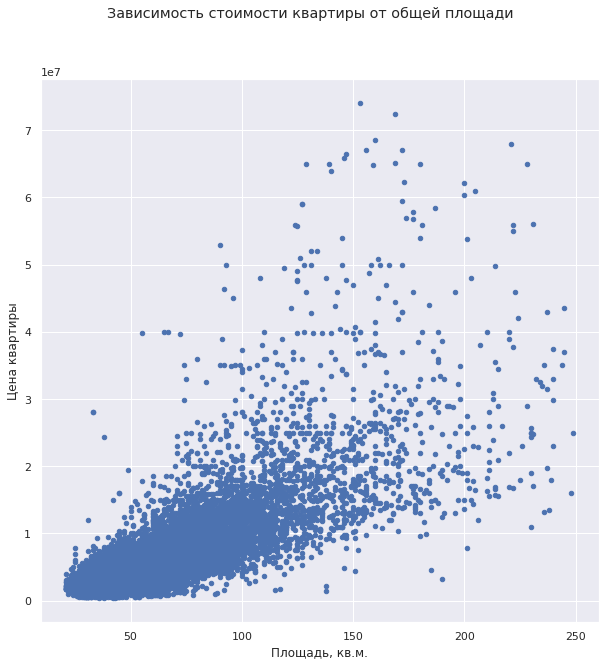

In [323]:
#построим график разброса по сводной таблице
flats_data_good.plot(x='total_area', y='last_price', kind='scatter', figsize=(10, 10), sharex=False, grid=True)
plt.suptitle('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Цена квартиры');

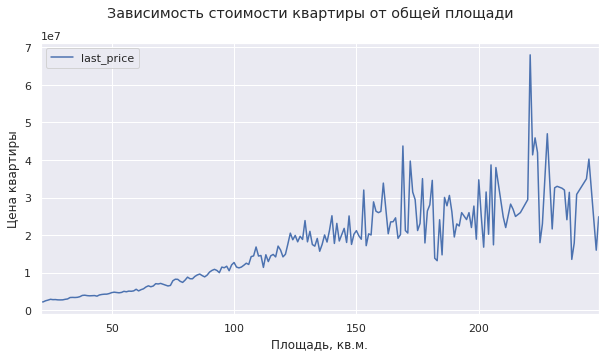

In [324]:
#для наглядности построим еще и линейный график 
area_pivot.plot(y='last_price', style='-',  figsize=(10, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от общей площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Цена квартиры');

In [325]:
#посчитаем коэффициент корреляции
flats_data_good['total_area'].corr(flats_data_good['last_price'])

0.758351688277923

Наши расчеты показали, что зависимость стоимости квартиры от ее площади растет пропорционально до площади около 100 кв.м., что довольно логично. Зависимость сильная, коэффициент корреляции (0,76) высок. Выше значения в 150 кв.м. цена квартиры сильнее зависит от совокупности различных факторов, а не только от ее площади.

Теперь рассмотрим зависимость цен на квартиры от удаленности от центра Санкт-Петербурга.

In [326]:
#сводная таблица зависимости цены от удаленности от центра
citycenter_pivot = flats_data_good.pivot_table(index = 'cityCenters_nearest', values = 'last_price', aggfunc = 'mean')
citycenter_pivot.columns = ['last_price']
citycenter_pivot

,last_price
cityCenters_nearest,
181.0,31099000.0
208.0,5800000.0
215.0,10990000.0
287.0,9590000.0
291.0,11500000.0
...,...
64857.0,3650000.0
65105.0,3300000.0
65764.0,4000000.0


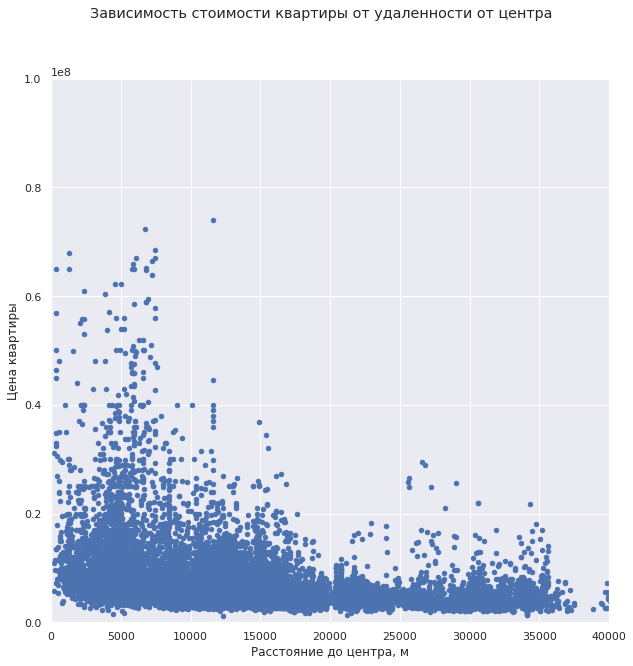

In [327]:
#построим график разброса
flats_data_good.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(10, 10), grid=True)
plt.ylim(0, 1e8)
plt.xlim(0, 40000)
plt.suptitle('Зависимость стоимости квартиры от удаленности от центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена квартиры');

In [328]:
#вычислим коэффициент Пирсона (коррелляции)
flats_data_good['cityCenters_nearest'].corr(flats_data_good['last_price'])

-0.32120303088404883

Как и ожидалось, зависимость (пусть и не очень сильная) стоимости квартиры от удаленности от центра существует. Практически все самые дорогие квартиры находятся максимум в 8км от центра. Отрицательный коэффициент Пирсона показывает, что, чем дальше квартира от центра, тем ниже ее цена.

Следующий признак - кол-во комнат. Предположительно, зависимость должна быть довольно высока, больше комнат - выше стоимость.

In [329]:
#сводная таблица зависимости стоимости квартиры от кол-ва комнат
room_pivot = flats_data_good.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
room_pivot.columns = ['last_price']
room_pivot

,last_price
rooms,
0,3.035032e+06
1,3.838254e+06
2,5.548989e+06
3,7.881979e+06
4,1.190080e+07
5,1.624296e+07
6,1.749840e+07
7,2.027306e+07


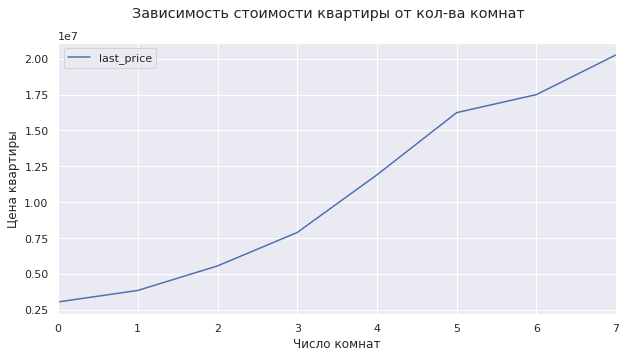

In [330]:
#построим график
room_pivot.plot(y='last_price', style='-',  figsize=(10, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от кол-ва комнат')
plt.xlabel('Число комнат')
plt.ylabel('Цена квартиры');

In [331]:
#вычислим коэффициент корреляции
flats_data_good['rooms'].corr(flats_data_good['last_price'])

0.46319616542636727

Гипотеза насчет зависимости стоимости от количества комнат подтвердилась. Даже на большом количестве комнат (больше 4) график растет. Лишь при очень высоком числе комнат зависимость пропадает, но в квартирах такого размера на первый план выходят уже иные факторы.

Рассмотрим зависимость стоимости квартиры от этажа.

In [332]:
#создадим сводную таблицу зависимости цены квартиры от этажа
floor_pivot = flats_data_good.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'mean').sort_values(by = 'last_price') 
floor_pivot.columns = ['last_price']
floor_pivot

,last_price
floor_type,
Первый,4.641316e+06
Последний,5.819071e+06
Другой,6.299922e+06


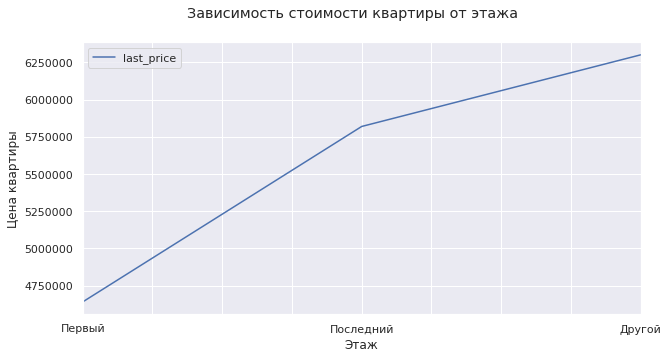

In [333]:
#построим линейный график по сводной таблице
floor_pivot.plot(y='last_price', style = '-',   figsize=(10, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена квартиры');

Коэффициент корреляции можно расчитать только для столбца с конкретным этажом, но он не будет нагляден. Разбивка на группы оказалась эффективна. Квартиры на первом и последнем этажах оказались дешевле квартир в промежутке между ними. На это могут повлиять следующие факторы: защищенность от проникновения воров, комфортабельность (высокое скопление людей у входа и под окнами для первого этажа, близость крыши и чердака для второго).

Осталось рассмотреть влияние дня, месяца и года размещения объявления.

In [334]:
#сводная таблица зависимости стоимости квартиры от дня размещения
day_pivot = flats_data_good.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'mean'
                               ).sort_values(by = 'last_price').sort_index()
day_pivot.columns = ['last_price']
day_pivot

,last_price
weekday,
0,6.103147e+06
1,6.016194e+06
2,6.069086e+06
3,6.205683e+06
4,5.931598e+06
5,5.857273e+06
6,5.782631e+06


In [335]:
#сводная таблица зависимости стоимости квартиры от месяца размещения
month_pivot = flats_data_good.pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean'
                                 ).sort_values(by = 'last_price').sort_index()
month_pivot.columns = ['last_price']
month_pivot

,last_price
month,
1,6.106550e+06
2,6.068543e+06
3,5.886853e+06
4,5.973153e+06
5,6.092609e+06
6,5.951830e+06
7,6.054739e+06
8,6.067579e+06
9,6.060868e+06


In [336]:
#сводная таблица зависимости стоимости квартиры от года размещения
year_pivot = flats_data_good.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean'
                                ).sort_values(by = 'last_price').sort_index()
year_pivot.columns = ['last_price']
year_pivot

,last_price
year,
2014,1.095969e+07
2015,7.396315e+06
2016,6.241150e+06
2017,5.925407e+06
2018,5.692407e+06
2019,6.320475e+06


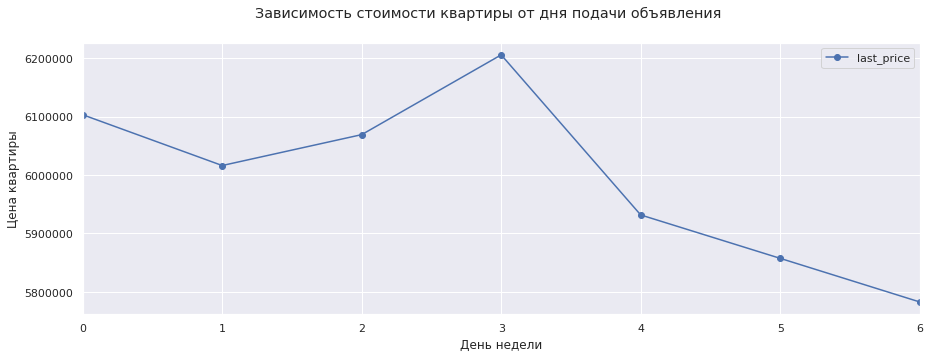

In [337]:
#линейный график зависимости стоимости квартиры от дня размещения
day_pivot.plot(y='last_price', style='o-',  figsize=(15, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от дня подачи объявления')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры');

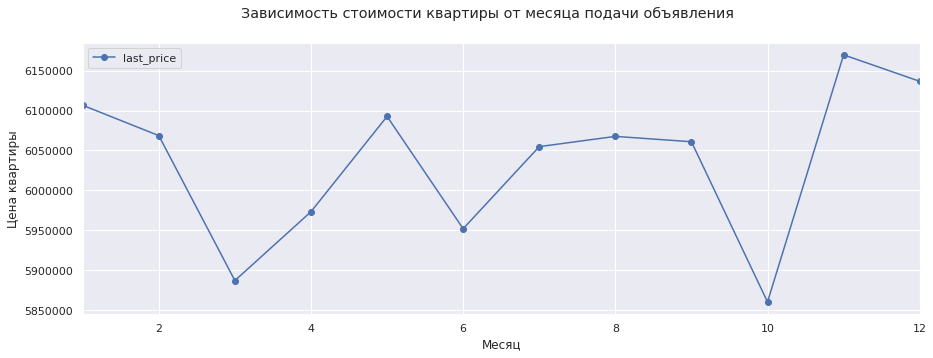

In [338]:
#линейный график зависимости стоимости квартиры от месяца размещения
month_pivot.plot(y='last_price', style='o-',  figsize=(15, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от месяца подачи объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры');

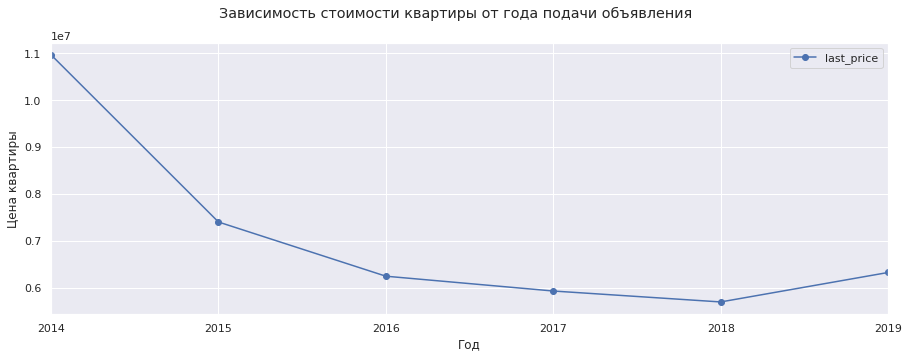

In [339]:
#линейный график зависимости стоимости квартиры от года размещения
year_pivot.plot(y='last_price', style='o-',  figsize=(15, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от года подачи объявления')
plt.xlabel('Год')
plt.ylabel('Цена квартиры');

Вывод разместим в общем выводе по разделу.

Напоследок выведем тепловую карту для матрицы корреляции, чтобы проанализировать, какие еще признаки влияют на цену квартир.

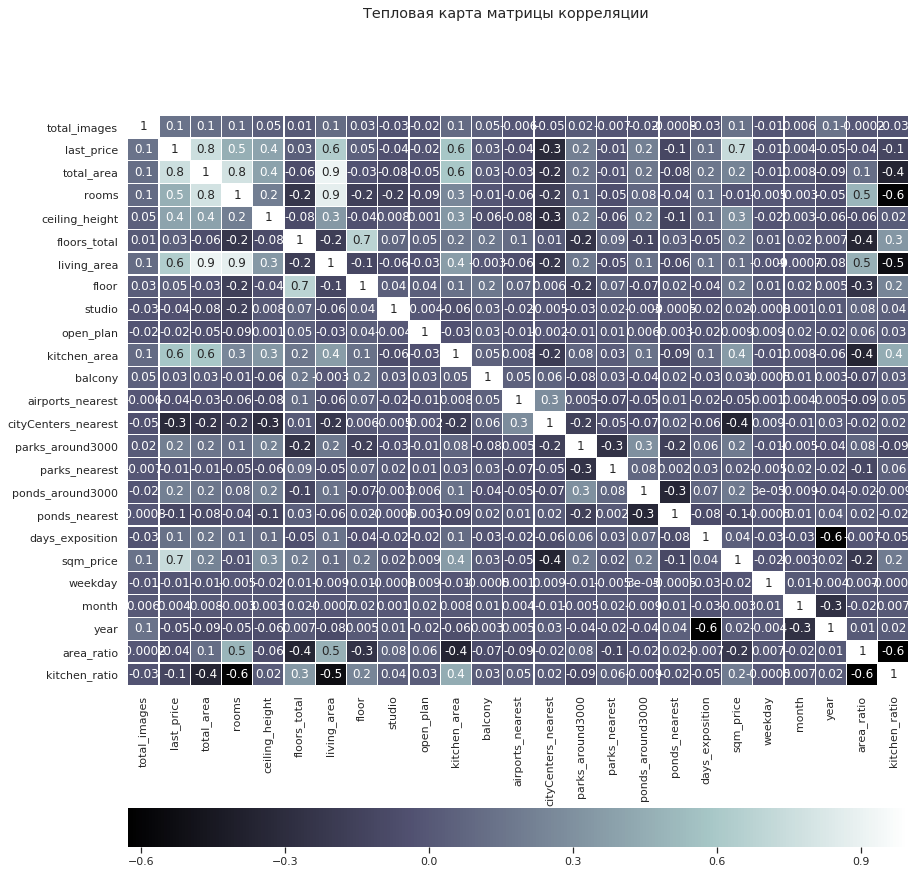

In [340]:
fig, ax = plt.subplots(figsize=(14,15)) 
sns.heatmap(flats_data_good.corr(), annot = True, 
            fmt='.1g', cmap= 'bone', linewidths=.3, cbar_kws= {'orientation': 'horizontal'})
plt.suptitle('Тепловая карта матрицы корреляции');

По построенной тепловой карте можно сделать вывод, что в основном стоимость квартиры зависит от изученных нами параметров (площадь, число комнат, в меньшей степени удаленность от центра). Также достаточно высокая зависимость цены от жилой площади ('living_area'), площади кухни ('kitchen_area') и стоимости квадратного метра (sqm_price), что логично.

#### Вывод

<li> Зависимость стоимости квартиры от ее площади растет пропорционально до площади около 100 кв.м., что довольно логично. Выше значения в 150 кв.м. цена квартиры сильнее зависит от совокупности различных факторов, а не только от ее площади. Плюс ко всему, количество исследуемых квартир с площадью больше 200кв.м. не так велико, поэтому кривая в этой области имеет ломаный вид. </li>
<li> Как и ожидалось, зависимость (пусть и не очень сильная) стоимости квартиры от удаленности от центра существует. Практически все самые дорогие квартиры находятся максимум в 8км от центра. </li>
<li> Зависимость проста, больше комнат - выше стоимость. Зависимость не столь сильна (коэффициент корреляции 0,39), но стабильна. Даже на большом количестве комнат (больше 4) график растет. Лишь при очень высоком числе комнат зависимость пропадает, но в квартирах такого размера на первый план выходят уже иные факторы. </li>
<li> Квартиры на первом и последнем этажах оказались дешевле квартир в промежутке между ними. На это могут повлиять следующие факторы: защищенность от проникновения воров, комфортабельность (высокое скопление людей у входа и под окнами для первого этажа, близость крыши и чердака для второго). </li>
<li>Самые дорогие квартиры размещают в среду, возможно, в середине недели люди оптимистичнее, чем при стрессе в начале рабочей недели, усталости в конце и расслабленности на выходных (при этом этот подъем выражен несильно). Также самые дорогие объявления появляются перед новым годом (и здесь разброс по месяцам минимален). С 2014 года наблюдалось падение цен на квартиры (видимо в связи с экономической ситуацией в стране), в 2016-2018 годах падение замедлилось и в 2019 году начался рост цен.  </li>

#### Поиск населенных пунктов с наиболее дорогим жильем <a id='step4.4'></a>

Выделим 10 населенных пунктов с наибольшим числом объявлений.

In [341]:
#создадим переменную flats_data_locality, запишем в нее сводную таблицу зависимости названия населнного пункта от количества объявлений
flats_data_locality = flats_data_good.pivot_table(index = 'locality_name', values = 'last_price', aggfunc = 'count').sort_values(by = 'last_price', ascending = False).head(10)
flats_data_locality.columns = ['Кол-во объявлений']
flats_data_locality

,Кол-во объявлений
locality_name,
Санкт-Петербург,15528
посёлок Мурино,516
посёлок Шушары,439
Всеволожск,396
Пушкин,366
Колпино,337
посёлок Парголово,327
Гатчина,306
деревня Кудрово,298


In [342]:
#получим срез очищенного датафрейма по топ10 населенных пунктов из сводной таблицы
locality_data = flats_data_good.query('locality_name in @flats_data_locality.index')
locality_data.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,1,7,3350000.0,40,2018-12-04,1,2.70,11,18.600000,1,...,0.0,NaN,81.0,83750.000000,1,12,2018,Первый,0.465000,0.275000
2,2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857
3,3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484
4,4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18742,23689,13,3550000.0,35,2018-02-28,1,2.86,15,16.300000,4,...,2.0,652.0,29.0,101428.571429,2,2,2018,Другой,0.465714,0.257143
18743,23690,3,5500000.0,52,2018-07-19,2,2.55,5,31.000000,2,...,0.0,NaN,15.0,105769.230769,3,7,2018,Другой,0.596154,0.115385
18744,23691,11,9470000.0,72,2016-10-13,2,2.75,25,40.300000,7,...,1.0,806.0,519.0,131527.777778,3,10,2016,Другой,0.559722,0.152778
18745,23694,9,9700000.0,133,2017-03-21,3,3.70,5,73.300000,3,...,3.0,381.0,NaN,72932.330827,1,3,2017,Другой,0.551128,0.105263


In [343]:
#создадим сводную таблицу зависимости стоимости квадратного метра недвижимости от населенного пункта
locality_pivot = locality_data.pivot_table(index = 'locality_name', values = 'sqm_price', aggfunc = 'mean'
                                          ).sort_values(by = 'sqm_price'
                                          ).astype('int')
locality_pivot.columns = ['Цена кв.м.']
locality_pivot

,Цена кв.м.
locality_name,
Выборг,58346
Гатчина,69057
Всеволожск,69078
Колпино,75644
посёлок Шушары,79047
посёлок Мурино,86267
посёлок Парголово,90675
деревня Кудрово,93012
Пушкин,103568


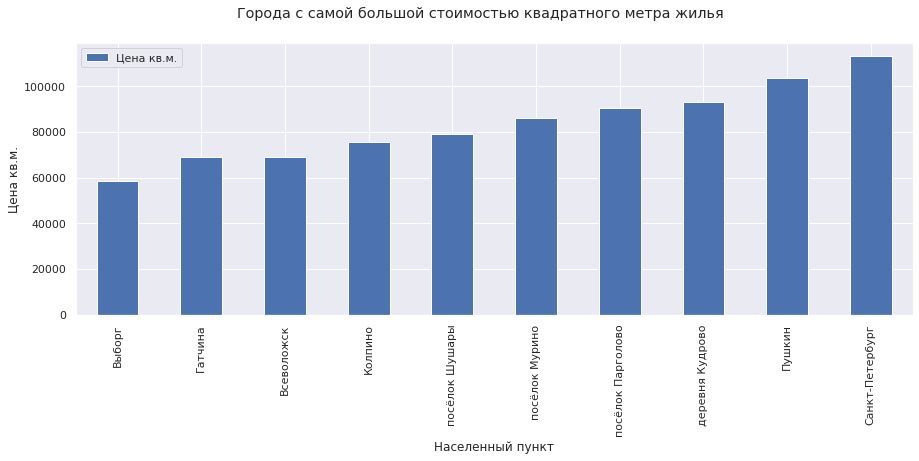

In [344]:
#для наглядности выведем линейный график 
locality_pivot.plot(y = 'Цена кв.м.', kind = 'bar',  figsize=(15, 5), grid=True)
plt.suptitle('Города с самой большой стоимостью квадратного метра жилья')
plt.xlabel('Населенный пункт')
plt.ylabel('Цена кв.м.');

#### Вывод

Как и ожидалось, самое дорогое жилье - в главном городе области, Санкт-Петербурге. Далее идут ближайшие пригороды и за ними крупные города Ленинградской области. Разница в средней стоимости между столицей и десятым местом - практически два раза.

#### Поиск центра Санкт-Петербурга <a id='step4.5'></a>

Займемся Северной столицей, получим срез по имени населенного пункта и добавим столбец удаленности квартиры от центра в километрах.

In [345]:
#срез по населенному пункту
spb_good = flats_data_good.loc[flats_data_good['locality_name'] == 'Санкт-Петербург']
#ознакомимся с результатом
spb_good

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio
0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481
2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,NaN,...,2.0,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857
3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,NaN,...,3.0,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484
4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000
7,5,7915000.0,71,2019-04-18,2,2.70,24,31.736849,22,NaN,...,0.0,NaN,NaN,111478.873239,3,4,2019,Другой,0.446998,0.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35,2018-02-28,1,2.86,15,16.300000,4,NaN,...,2.0,652.0,29.0,101428.571429,2,2,2018,Другой,0.465714,0.257143
23690,3,5500000.0,52,2018-07-19,2,2.55,5,31.000000,2,NaN,...,0.0,NaN,15.0,105769.230769,3,7,2018,Другой,0.596154,0.115385
23691,11,9470000.0,72,2016-10-13,2,2.75,25,40.300000,7,NaN,...,1.0,806.0,519.0,131527.777778,3,10,2016,Другой,0.559722,0.152778
23694,9,9700000.0,133,2017-03-21,3,3.70,5,73.300000,3,NaN,...,3.0,381.0,NaN,72932.330827,1,3,2017,Другой,0.551128,0.105263


In [346]:
#отключим предупреждения о цепных назначениях
pd.options.mode.chained_assignment = None
#добавим столбец с километрами до центра
spb_good['km_to_center'] = (spb_good['cityCenters_nearest'] / 1000).astype('int')
spb_good.reset_index()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio,km_to_center
0,0,20,13000000.0,108,2019-03-07,3,2.70,16,51.000000,8,...,755.0,NaN,120370.370370,3,3,2019,Другой,0.472222,0.231481,16
1,2,10,5196000.0,56,2015-08-20,2,2.55,5,34.300000,4,...,574.0,558.0,92785.714286,3,8,2015,Другой,0.612500,0.142857,13
2,3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,...,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484,6
3,4,2,10000000.0,100,2018-06-19,2,3.03,14,32.000000,13,...,48.0,121.0,100000.000000,1,6,2018,Другой,0.320000,0.410000,8
4,7,5,7915000.0,71,2019-04-18,2,2.70,24,31.736849,22,...,NaN,NaN,111478.873239,3,4,2019,Другой,0.446998,0.267606,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,23689,13,3550000.0,35,2018-02-28,1,2.86,15,16.300000,4,...,652.0,29.0,101428.571429,2,2,2018,Другой,0.465714,0.257143,16
15524,23690,3,5500000.0,52,2018-07-19,2,2.55,5,31.000000,2,...,NaN,15.0,105769.230769,3,7,2018,Другой,0.596154,0.115385,6
15525,23691,11,9470000.0,72,2016-10-13,2,2.75,25,40.300000,7,...,806.0,519.0,131527.777778,3,10,2016,Другой,0.559722,0.152778,4
15526,23694,9,9700000.0,133,2017-03-21,3,3.70,5,73.300000,3,...,381.0,NaN,72932.330827,1,3,2017,Другой,0.551128,0.105263,4


Рассчитаем среднюю цену недвижимости для каждого километра:

In [347]:
#создадим сводную таблицу стоимости квартиры от удаленности в км
spb_km_pivot = spb_good.pivot_table(index = 'km_to_center', values = 'last_price', aggfunc = 'mean')
spb_km_pivot.columns = ['Средняя_цена']
spb_km_pivot.head()

,Средняя_цена
km_to_center,
0,1.691909e+07
1,1.253396e+07
2,1.202975e+07
3,1.066003e+07
4,1.198411e+07


Построим линейный график зависимости стоимости квартир на каждом км:

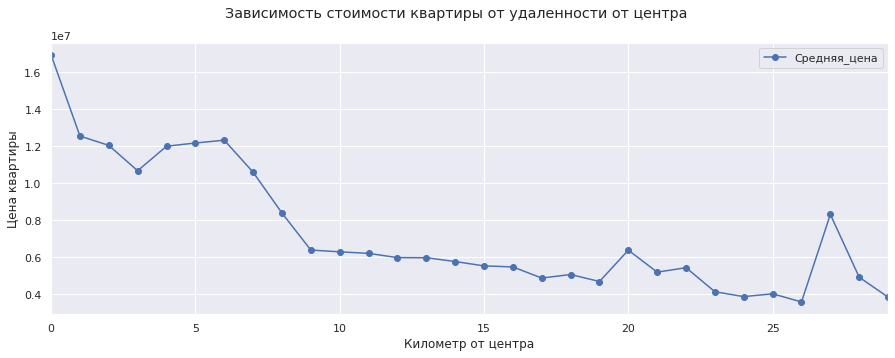

In [348]:
#строим линейный график по сводной таблице
spb_km_pivot.plot(y = 'Средняя_цена', style='o-',  figsize=(15, 5), grid=True)
plt.suptitle('Зависимость стоимости квартиры от удаленности от центра')
plt.xlabel('Километр от центра')
plt.ylabel('Цена квартиры');

Судя по построенному графику, центром Санкт-Петербурга можно считать или радиус в 2км, или радиус в 6км. Выберем больший радиус, так как средняя стоимость жилплощади на 6км от центра практически равна стоимости в радиусе 2 км. Возможно большую роль в этом играет Василеостровский район. В целом график ожидаем, за исключением изломов в центральном районе, с удалением от центра стоимость квартир падает.

In [349]:
#создаем новый датафрейм по срезу с условием удаленности от центра не более 6км
spb_center = spb_good.query('km_to_center <= 6').reset_index()
spb_center

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,sqm_price,weekday,month,year,floor_type,area_ratio,kitchen_ratio,km_to_center
0,3,0,64900000.0,159,2015-07-24,3,2.70,14,47.387941,9,...,234.0,424.0,408176.100629,4,7,2015,Другой,0.298037,0.097484,6
1,24,8,6500000.0,97,2015-10-31,2,3.00,3,46.500000,1,...,124.0,265.0,67010.309278,5,10,2015,Первый,0.479381,0.206186,2
2,35,6,15500000.0,149,2017-06-26,5,2.55,5,104.000000,4,...,779.0,644.0,104026.845638,0,6,2017,Другой,0.697987,0.114094,3
3,51,7,45000000.0,161,2017-10-17,3,3.20,8,38.000000,4,...,99.0,541.0,279503.105590,1,10,2017,Другой,0.236025,0.310559,6
4,52,20,11795000.0,136,2017-09-22,6,3.00,2,94.000000,2,...,NaN,NaN,86727.941176,4,9,2017,Последний,0.691176,0.080882,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3167,23664,5,9000000.0,110,2015-12-10,4,3.36,7,64.600000,5,...,118.0,816.0,81818.181818,3,12,2015,Другой,0.587273,0.145455,5
3168,23665,11,4250000.0,47,2016-05-20,1,3.00,6,18.200000,1,...,519.0,131.0,90425.531915,4,5,2016,Первый,0.387234,0.319149,4
3169,23690,3,5500000.0,52,2018-07-19,2,2.55,5,31.000000,2,...,NaN,15.0,105769.230769,3,7,2018,Другой,0.596154,0.115385,6
3170,23691,11,9470000.0,72,2016-10-13,2,2.75,25,40.300000,7,...,806.0,519.0,131527.777778,3,10,2016,Другой,0.559722,0.152778,4


#### Вывод

По результатам исследования, построенным гистограммам и сводным таблицам зависимости цены недвижимости от удаленности от центра города, центром Санкт-Петербурга можно считать или радиус в 6км.

#### Исследование квартир в центре Санкт-Петербурга <a id='step4.6'></a>

Для оценки признаков выборки квартир в центре создадим новую таблицу со столбцами с общей площадью, стоимостью, кол-вом комнат и высотой потолков. Для сравнения со всей областью, создадим подобную таблицу по общему датафрейму.

In [350]:
#таблица для всей области
overall_spb = flats_data_good[['total_area', 'last_price', 'rooms', 'ceiling_height']]
overall_spb

,total_area,last_price,rooms,ceiling_height
0,108,13000000.0,3,2.70
1,40,3350000.0,1,2.70
2,56,5196000.0,2,2.55
3,159,64900000.0,3,2.70
4,100,10000000.0,2,3.03
...,...,...,...,...
23694,133,9700000.0,3,3.70
23695,59,3100000.0,3,2.55
23696,56,2500000.0,2,3.00
23697,76,11475000.0,2,3.00


In [351]:
#таблица для центра города
overall_center = spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']]
overall_center

,total_area,last_price,rooms,ceiling_height
0,159,64900000.0,3,2.70
1,97,6500000.0,2,3.00
2,149,15500000.0,5,2.55
3,161,45000000.0,3,3.20
4,136,11795000.0,6,3.00
...,...,...,...,...
3167,110,9000000.0,4,3.36
3168,47,4250000.0,1,3.00
3169,52,5500000.0,2,2.55
3170,72,9470000.0,2,2.75


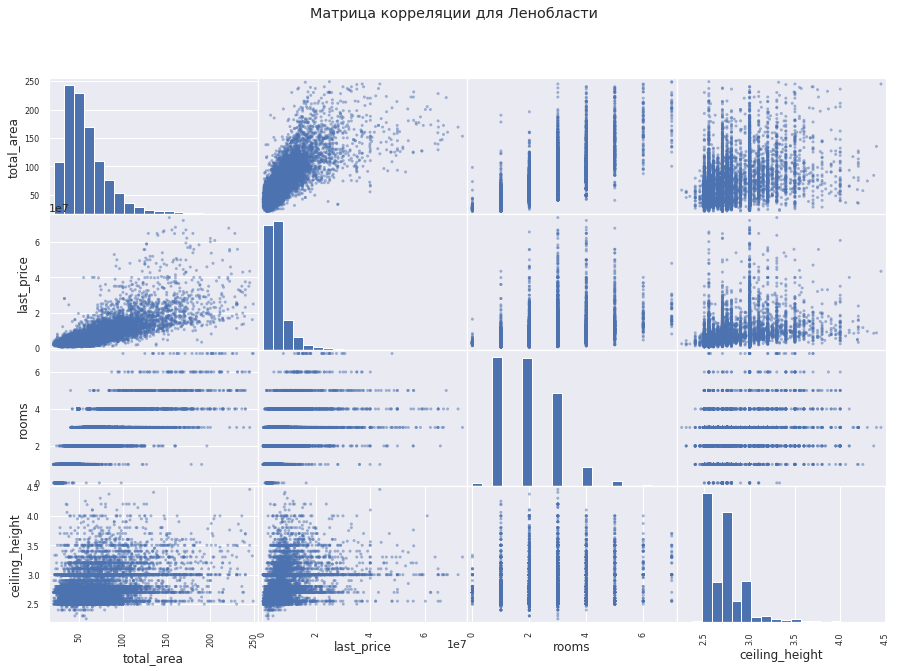

In [352]:
#строим матрицу рассеивания по всей области
pd.plotting.scatter_matrix(overall_spb, hist_kwds={'bins': 20}, figsize=(15, 10))
plt.suptitle('Матрица корреляции для Ленобласти');

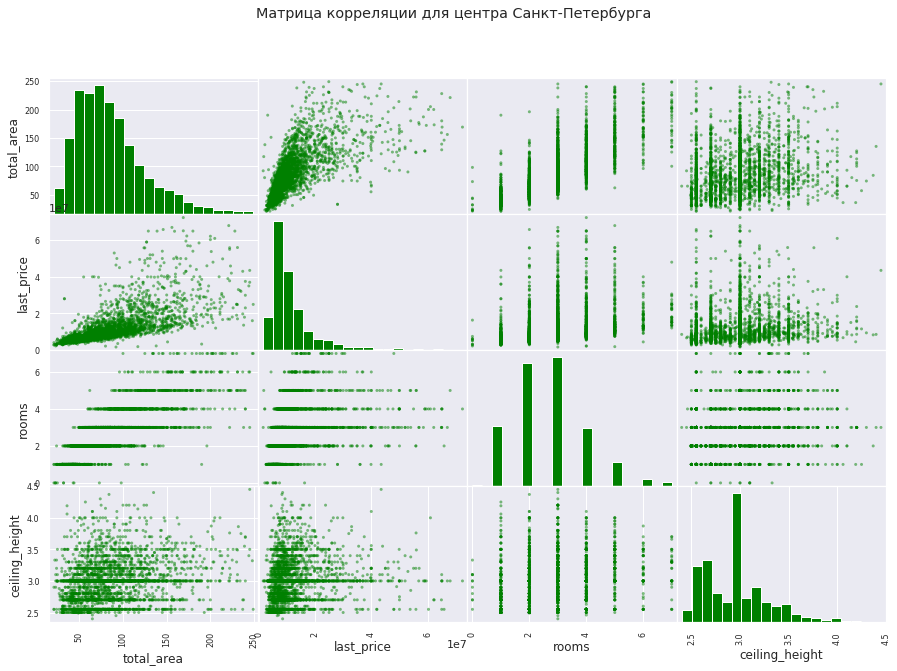

In [353]:
#строим матрицу рассеивания для центра Санкт-Петербурга
pd.plotting.scatter_matrix(overall_center, color = 'green', 
                           hist_kwds={'bins': 20, 'color':'green'}, figsize=(15, 10), grid = True)
plt.suptitle('Матрица корреляции для центра Санкт-Петербурга');

In [354]:
#посмотрим описание таблицы центральной части
overall_center.describe() 

,total_area,last_price,rooms,ceiling_height
count,3172.000000,3.172000e+03,3172.000000,3172.000000
mean,86.201765,1.201917e+07,2.752522,2.979256
std,40.447687,9.155493e+06,1.255794,0.330073
min,21.000000,1.600000e+06,0.000000,2.400000
25%,57.000000,6.700000e+06,2.000000,2.700000
50%,78.000000,9.000000e+06,3.000000,3.000000
75%,107.000000,1.350000e+07,3.000000,3.150000
max,249.000000,7.237500e+07,7.000000,4.450000


In [355]:
#посмотрим описание таблицы всей области
overall_spb.describe()

,total_area,last_price,rooms,ceiling_height
count,23431.000000,2.343100e+04,23431.000000,23431.000000
mean,58.506765,6.028607e+06,2.046562,2.709913
std,27.996956,5.286741e+06,1.008039,0.223298
min,21.000000,4.500000e+05,0.000000,2.250000
25%,40.000000,3.400000e+06,1.000000,2.550000
50%,52.000000,4.600000e+06,2.000000,2.700000
75%,69.000000,6.700000e+06,3.000000,2.750000
max,249.000000,7.400000e+07,7.000000,4.450000


По сравнению с Ленинградской областью в целом, в центре Санкт-Петербурга заметно большее воличество квартир площадью более 100 кв.м. и высокими потолками (преобладают потолки высотой 3 - 3.2м - большое количество старых зданий начала 20 века).
Если по области чаще всего продают квартиры с 1-2 комнатами, то в центре столицы чаще всего встречаются в продаже трехкомнатные квартиры, также довольно много 4 и 5-комнатных квартир (все те же старые здания). 
Заметен рост средней стоимости квартир (среднее и медианное значение в центре примерно в 2 раза выше). Средняя площадь квартиры в центре примерно в 1,5 раза выше средней по области (87 против 59 кв.м.). Население городов раньше было заметно меньшим, места для недвижимости больше, плотность застройки ниже, по-видимому, и квартиры строили с большим размахом.

#### Влияние различных признаков на стоимость квартиры в центре и сравнение с аналогичным влиянием по области <a id='step4.7'></a>

In [356]:
#выведем сводную таблицу средней площади квартиры для центра СПБ и всей области
area_pivot_center = spb_center.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'mean')
#объединим со сводной таблицей по всей области
area_merged = area_pivot_center.merge(area_pivot, on = 'total_area', how = 'inner').sort_index()
area_merged.columns = ['Цена центр СПБ', 'Цена область']
area_merged

,Цена центр СПБ,Цена область
total_area,,
21,3.176667e+06,2.215882e+06
22,3.100000e+06,2.231186e+06
23,2.765333e+06,2.529259e+06
24,3.298800e+06,2.707153e+06
25,4.288167e+06,2.920949e+06
...,...,...
240,3.013333e+07,3.085000e+07
244,3.500000e+07,3.500000e+07
245,4.025000e+07,4.025000e+07


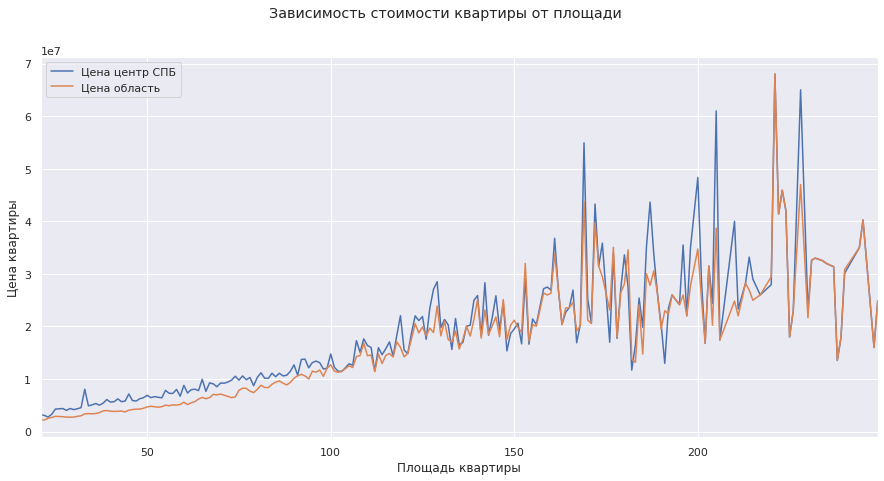

In [357]:
#построим график зависимости средней площади квартиры для центра СПБ и всей области
area_merged.plot(style = '-',figsize = (15, 7))
plt.suptitle('Зависимость стоимости квартиры от площади')
plt.xlabel('Площадь квартиры')
plt.ylabel('Цена квартиры');

За исключением некоторой разницы в стоимости квартир, зависимость для обеих выборок схожа, выше площадь квартиры - выше цена.

Рассмотрим зависимость стоимости квартиры от удаления от центра. Сравнивать с областью в общем смысла нет, начало графиков будет совпадать.

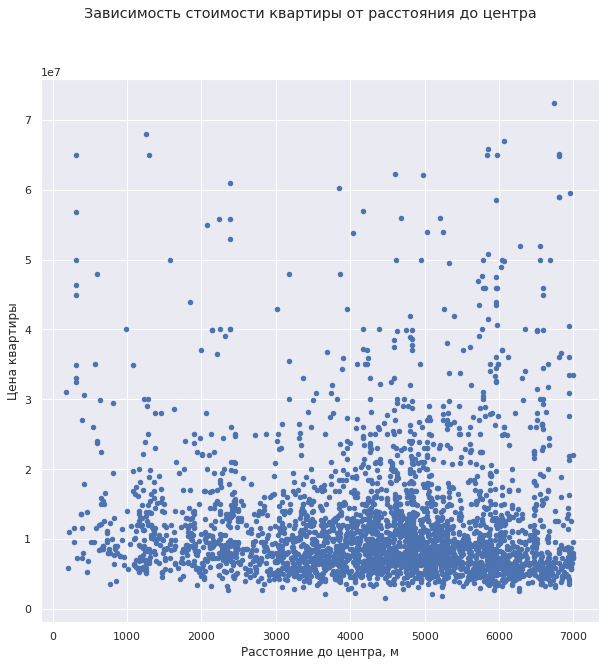

In [358]:
#построим диаграмму рассеивания
spb_center.plot(x = 'cityCenters_nearest', y = 'last_price', kind='scatter',  figsize=(10, 10), grid=True)
plt.suptitle('Зависимость стоимости квартиры от расстояния до центра')
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена квартиры');

В целом, чем шире окружность от центра - тем больше квартир, выше концентрация недорогого жилья и ниже - дорогого. В количественном же исчислении - дорогие квартиры распределены по всему центру.

In [359]:
#выведем сводную таблицу зависимости цены от количества комнат квартиры для центра СПБ и всей области
room_pivot_center = spb_center.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
room_pivot_center.columns = ['last_price_center']
#объединим со сводной таблицей по всей области
room_merged.columns = ['Цена центр СПБ', 'Цена область']
room_merged

,Цена центр СПБ,Цена область
rooms,,
0,5.738636e+06,3.035032e+06
1,6.963577e+06,3.838254e+06
2,9.581219e+06,5.548989e+06
3,1.336438e+07,7.881979e+06
4,1.555058e+07,1.190080e+07
5,1.821123e+07,1.624296e+07
6,1.812693e+07,1.749840e+07
7,2.075529e+07,2.027306e+07


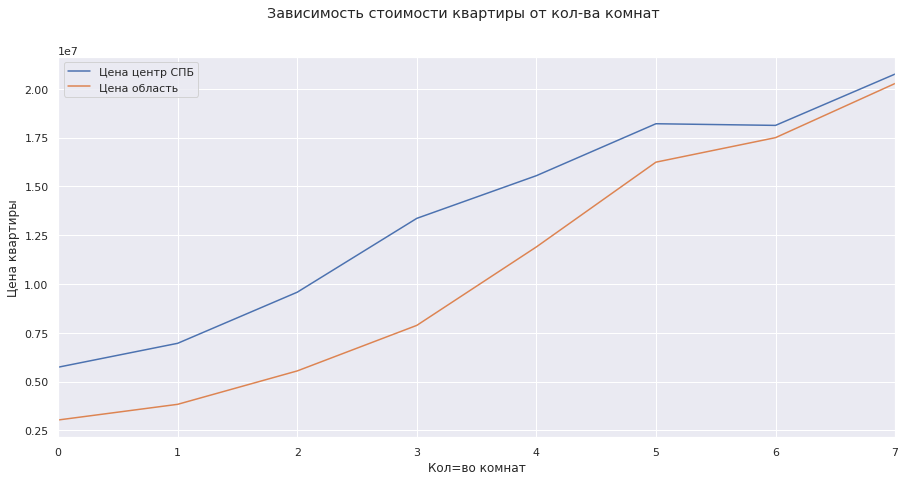

In [360]:
#построим график по сводной таблице
room_merged.plot(style = '-',figsize = (15, 7))
plt.suptitle('Зависимость стоимости квартиры от кол-ва комнат')
plt.xlabel('Кол=во комнат')
plt.ylabel('Цена квартиры');

Зависимость аналогична той, что мы получили ранее для всей Ленобласти. Больше комнат - выше стоимость, разница лишь в том, что эта стоимоость в центре значительно выше.

Рассмотрим также зависимость цены от даты подачи объявления.

In [361]:
#выведем сводную таблицу зависимости цены от дня публикации объявления для центра СПБ и всей области
day_pivot_center = spb_center.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'mean')
day_pivot_center.columns = ['last_price_center']
#объединим со сводной таблицей по всей области
day_merged = day_pivot_center.merge(day_pivot, on = 'weekday', how = 'inner').sort_index()
day_merged.columns = ['Цена центр СПБ', 'Цена область']
day_merged

,Цена центр СПБ,Цена область
weekday,,
0,1.246655e+07,6.103147e+06
1,1.197416e+07,6.016194e+06
2,1.192060e+07,6.069086e+06
3,1.212308e+07,6.205683e+06
4,1.181810e+07,5.931598e+06
5,1.174716e+07,5.857273e+06
6,1.178494e+07,5.782631e+06


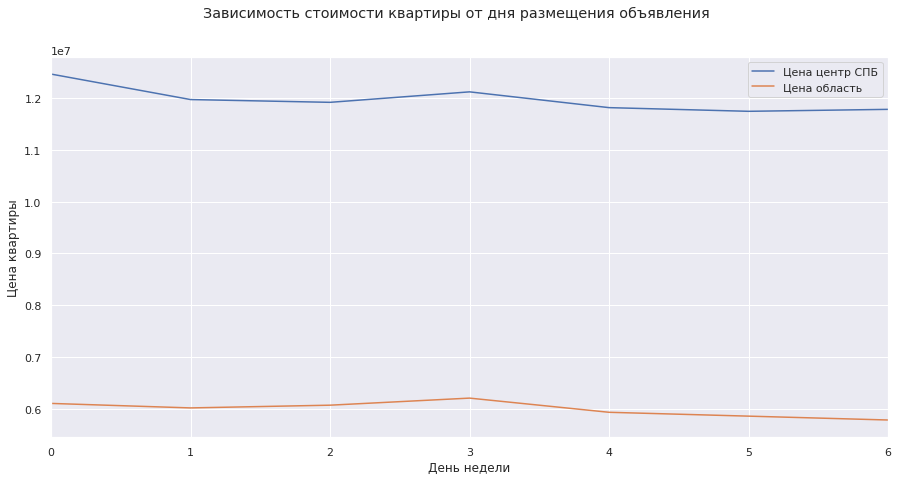

In [362]:
#построим график по сводной таблице
day_merged.plot(style = '-',figsize = (15, 7))
plt.suptitle('Зависимость стоимости квартиры от дня размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена квартиры');

Зависимость аналогичная рассчитанной ранее для области в целом. Небольшой пик в среду. В целом, зависимости от дня недели практически нет.

Рассмотрим такую же зависимость, но для месяца.

In [363]:
#выведем сводную таблицу зависимости цены от месяца публикации объявления для центра СПБ и всей области
month_pivot_center = spb_center.pivot_table(index = 'month', values = 'last_price', aggfunc = 'mean')
month_pivot_center.columns = ['last_price_center']
#объединим со сводной таблицей по всей области
month_merged = month_pivot_center.merge(month_pivot, on = 'month', how = 'inner').sort_index()
month_merged.columns = ['Цена центр СПБ', 'Цена область']
month_merged

,Цена центр СПБ,Цена область
month,,
1,1.294118e+07,6.106550e+06
2,1.282002e+07,6.068543e+06
3,1.186954e+07,5.886853e+06
4,1.146324e+07,5.973153e+06
5,1.138170e+07,6.092609e+06
6,1.146237e+07,5.951830e+06
7,1.198265e+07,6.054739e+06
8,1.216539e+07,6.067579e+06
9,1.136091e+07,6.060868e+06


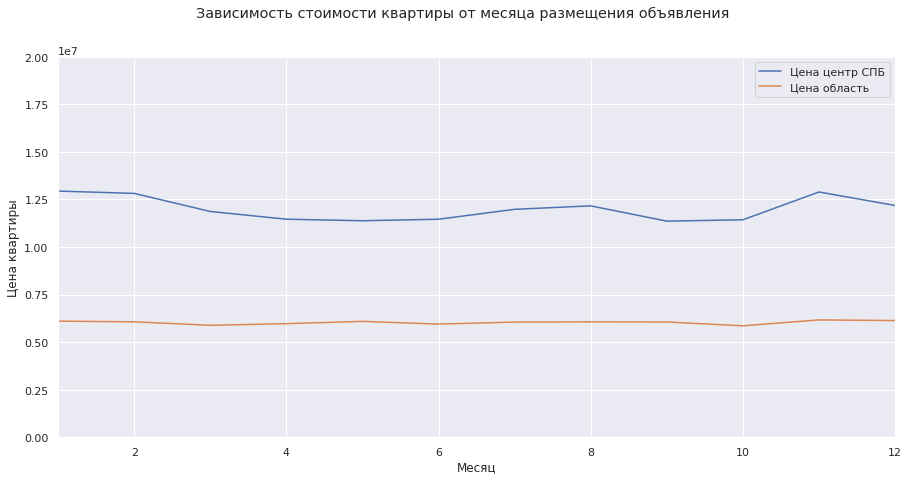

In [364]:
#построим график по сводной таблице
month_merged.plot(style = '-',figsize = (15, 7))
plt.ylim(0, 2e7)
plt.suptitle('Зависимость стоимости квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена квартиры');

Для центра СПБ характерен небольшой подъем цены в ноябре и январе-феврале, тогда как по области в целом картина по году ровная. В чем связь, трудно сказать, возможно, эксперты рынка дорогой недвижимости расскажут больше.

Наконец, выведем зависимость стоимость квартир от года объявления.

In [365]:
#выведем сводную таблицу зависимости цены от года публикации объявления для центра СПБ и всей области
year_pivot_center = spb_center.pivot_table(index = 'year', values = 'last_price', aggfunc = 'mean')
year_pivot_center.columns = ['last_price_center']
#объединим со сводной таблицей по всей области
year_merged = year_pivot_center.merge(year_pivot, on = 'year', how = 'inner').sort_index()
year_merged.columns = ['Цена центр СПБ', 'Цена область']
year_merged

,Цена центр СПБ,Цена область
year,,
2014,2.095831e+07,1.095969e+07
2015,1.329368e+07,7.396315e+06
2016,1.181984e+07,6.241150e+06
2017,1.189934e+07,5.925407e+06
2018,1.131890e+07,5.692407e+06
2019,1.289100e+07,6.320475e+06


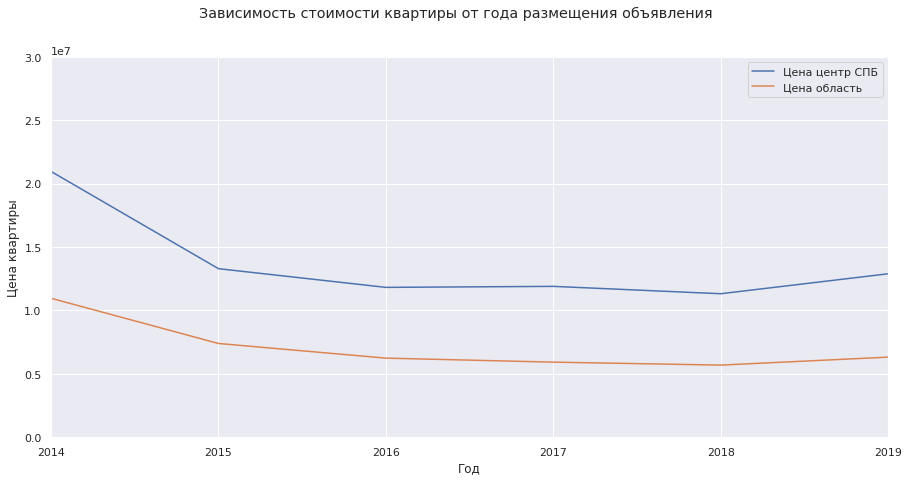

In [366]:
#построим график по сводной таблице
year_merged.plot(style = '-',figsize = (15, 7))
plt.ylim(0, 3e7)
plt.suptitle('Зависимость стоимости квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена квартиры');

Ситуация по центру схожа с ситуацией в целом по области, с той разницей, что дорогое жилье ждал более сильный обвал цен в 2014 году. Так же аналгично области в 2019 году начался рост цен.

#### Вывод

В целом, картина в центре Санкт-Петербурга и области схожа. Больше комнат, больше площадь, ближе к центру - выше цена. Основная разница -  в уровне цен в центре столицы и на окраинах.

### Шаг 5. Общий вывод   <a id='step5'></a>

Мной была проведена работа по исследованию рынка недвижимости Ленинградской области. 
Были обработаны пропуски в тех столбцах, где это возможно и нужно для проведения исследования, заменены типы данных в тех столбцах, где это требовалось для дальнейшего удобства работы над проектом.

Была исследованы основные параметры квартир, такие как: площадь, цена, число комнат, высота потолков. Построены гистограммы, удалены артефакты и выбросы. 
Какие факторы больше всего влияют на стоимость квартиры?
Высокая зависимость от самых явных признаков:
- площадь квартиры. Высокая зависимость, особенно для основной части квартир с площадью до 150 кв.м., больше площадь - пропорционально выше цена.
- число комнат. Аналогично площади, больше комнат - выше цена, дейстует даже для большого числа комнат.
- удаленность от центра. Ближе к центру - дороже квартиры. При этом центром Санкт-Петербурга можно считать территорию с достаточно большим радиусом (6 км). В этой области стоимость квартир заметно выше, чем на окраинах и пригородах. Самые дорогие квартиры неосредственно в самом центре (до 1 км).
- этаж, на котором расположена квартира. Квартиры на первом и последнем этажах дешевле всего. Скорее всего это связано с безопасностью (ниже шанс проникновения в квартиру) и комфортом (меньше шума и людей, никто не заглядывает в окна).
Зависимости от дня недели и месяца объявления пркатически нет. Если говорить о годах продажи, то цены отражают экономическую ситуацию (падение в 2014 году на фоне кризиса, постепенное замедление падения и начало роста в 2019 году).

При сравнении центра и окраин зависимости цены от различных признаков в целом неизменны. Разница лишь в цене квартир, в среднем она может быть двухкратной при том же количестве комнат и площади квартиры.
